In [1]:
import json
import numpy as np
import umap
import os
import matplotlib.pyplot as plt
from pprint import pprint

In [120]:
from dotenv import load_dotenv

load_dotenv()
folder_path = os.getenv('file_path_Munch')

## U-map для векторов resnet50

In [2]:
with open('features_resnet50.json', 'r', encoding='utf-8') as f:
    features_dict = json.load(f)

In [4]:
# before psychosis
count = 0
for i in features_dict:
    if i.split('_')[0] != 'yyyy':
        if int(i.split('_')[0]) >= 1908:
            # print(i) 
            count += 1

print(f'До лечения в психиатрической больнице: {len(features_dict) - count}')
print(f'После лечения: {count}')

До лечения в психиатрической больнице: 169
После лечения: 55


In [8]:
features = np.array([features_dict[filename] for filename in features_dict])
filenames = list(features_dict.keys())

In [ ]:
filenames_pics = [filename.split('/')[-1] for filename in filenames]
# print(filenames_pics)

#### Для всех картин в датасете

In [179]:
model = umap.UMAP(
            n_neighbors=3,
            n_components=2, 
            random_state=42
            )

In [180]:
results = model.fit_transform(features)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [181]:
colors = []
for filename in filenames:
    if filename.split('_')[0] == 'yyyy': # blue - before treatment
        colors.append('blue')
    elif int(filename.split('_')[0]) < 1908:
        colors.append('blue')
    else:
        colors.append('red') # red - after treatment

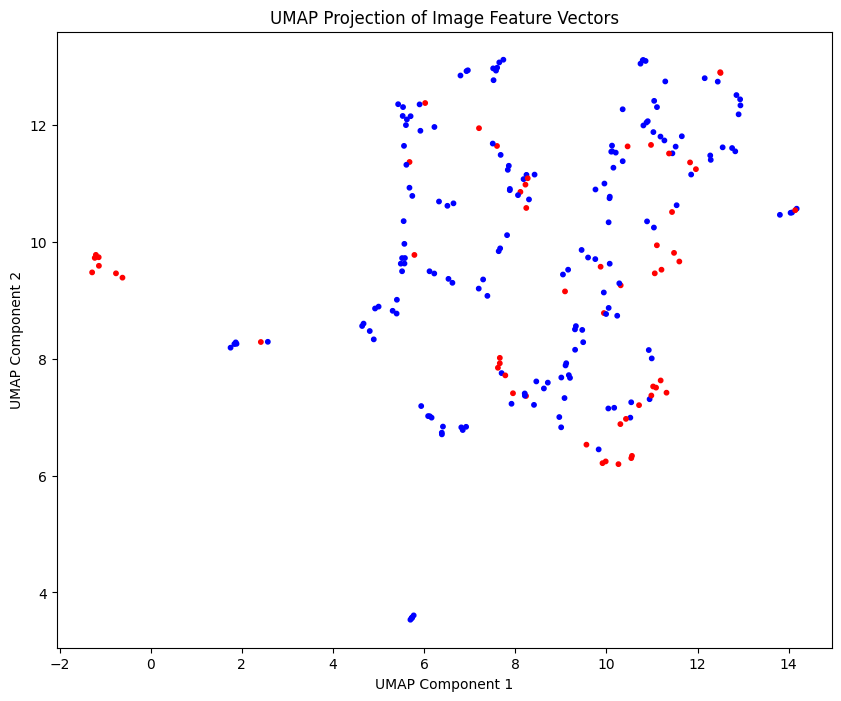

In [182]:
plt.figure(figsize=(10, 8))
# plt.scatter(results[:, 0], results[:, 1], s=10, c='blue', marker='o')
plt.scatter(results[:, 0], results[:, 1], s=10, c=colors, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# for i, filename in enumerate(filenames):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results[i, 0], results[i, 1]), fontsize=8)

plt.show()

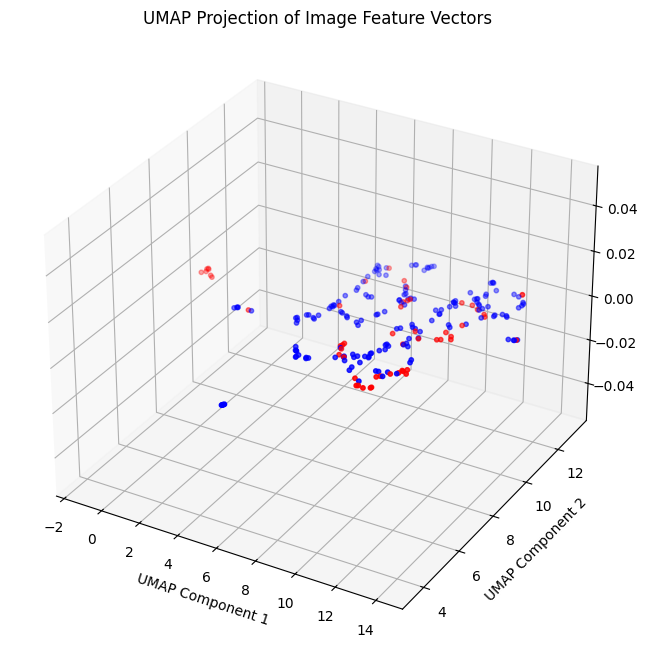

In [183]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results[:, 0], results[:, 1], s=10, c=colors, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# for i, filename in enumerate(filenames):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results[i, 0], results[i, 1]), fontsize=8)

plt.show()

In [184]:
from mpl_toolkits.mplot3d import Axes3D 
import re
import plotly.graph_objects as go

model = umap.UMAP(
            n_neighbors=5,
            n_components=3, 
            random_state=42
            )
results = model.fit_transform(features)

colors = []
for filename in filenames:
    year_part = filename.split('_')[0]

    if year_part == 'yyyy':
        colors.append('blue')
    else:
        year = int(year_part)
        if year < 1908:
            colors.append('blue')
        else:
            colors.append('red')

image_paths = [os.path.abspath(os.path.join(folder_path, f)) for f in filenames]

hover_texts = [f'<b>{f}</b>' for f in filenames]

fig = go.Figure(data=[go.Scatter3d(
    x=results[:, 0], y=results[:, 1], z=results[:, 2],
    mode='markers',
    marker=dict(size=5, color=colors, opacity=0.8),
    text=hover_texts
)])

fig.update_layout(
    title="Interactive 3D UMAP Projection",
    scene=dict(
        xaxis_title="UMAP Component 1",
        yaxis_title="UMAP Component 2",
        zaxis_title="UMAP Component 3"
    )
)

fig.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



#### Только для автопортретов

In [134]:
self_portraits_dict = {}

for key in features_dict:
    if '_a_' in key:
        self_portraits_dict[key] = features_dict[key]

print(f'Количество авторпортретов: {len(self_portraits_dict)}')

Количество авторпортретов: 52


In [135]:
count = 0
for i in self_portraits_dict:
    if i.split('_')[0] != 'yyyy':
        if int(i.split('_')[0]) >= 1908:
            # print(i) 
            count += 1

print(f'До лечения в психиатрической больнице: {len(self_portraits_dict) - count}')
print(f'После лечения: {count}')

До лечения в психиатрической больнице: 19
После лечения: 33


In [136]:
features_self_portrait = list(self_portraits_dict.values())
features_self_portrait = np.array(features_self_portrait)
print(len(features_self_portrait))

52


In [137]:
filenames_self_portrait = list(self_portraits_dict.keys())
print(len(filenames_self_portrait))

52


In [138]:
model = umap.UMAP(
            n_neighbors=3,
            n_components=2, 
            random_state=42
            )

In [139]:
results = model.fit_transform(features_self_portrait)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [140]:
colors = []
for filename in filenames_self_portrait:
    if '_a_' in filename:
        if filename.split('_')[0] == 'yyyy': 
            colors.append('blue')
        elif int(filename.split('_')[0]) < 1908:
            colors.append('blue')
        else:
            colors.append('red')

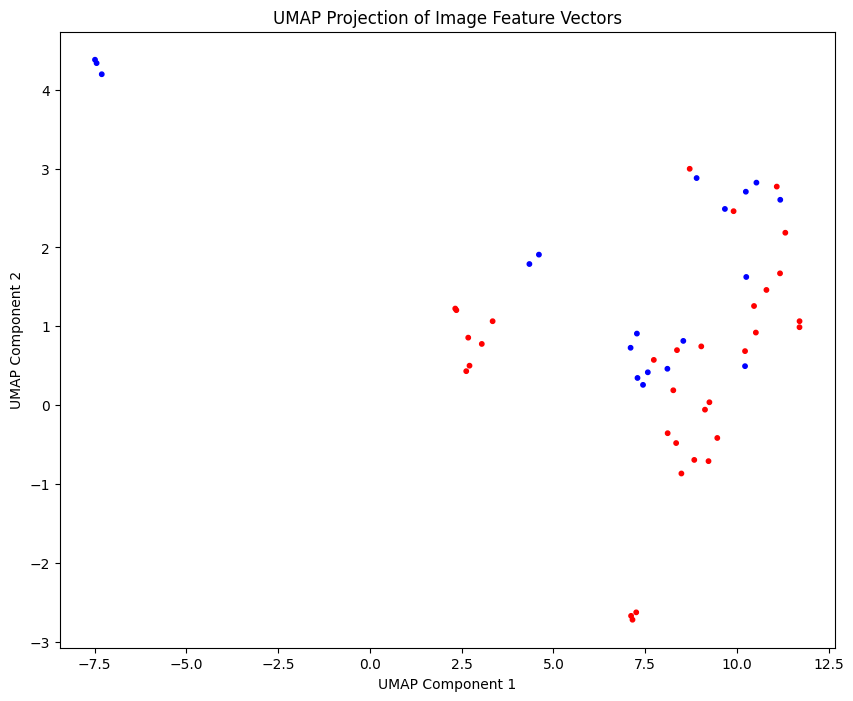

In [141]:
plt.figure(figsize=(10, 8))
plt.scatter(results[:, 0], results[:, 1], s=10, c=colors, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# for i, filename in enumerate(filenames):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results[i, 0], results[i, 1]), fontsize=8)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



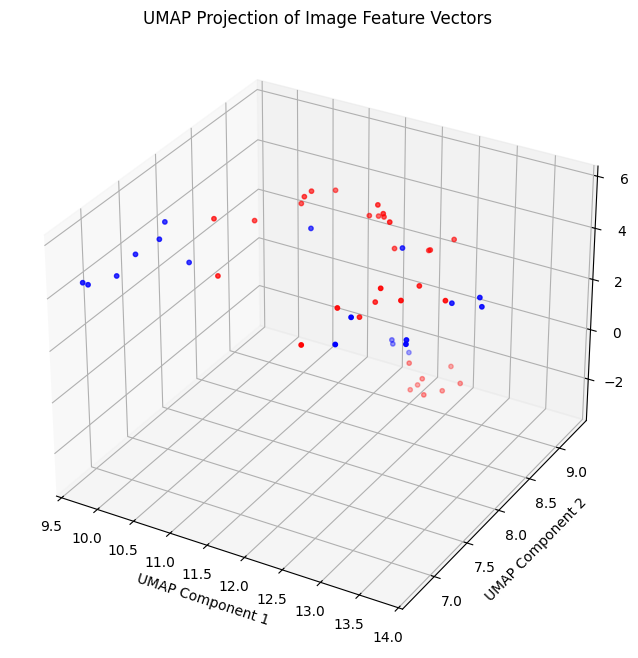

In [142]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

model = umap.UMAP(
            n_neighbors=5,
            n_components=3, 
            random_state=42
            )
results = model.fit_transform(features_self_portrait)

colors = []
for filename in filenames_self_portrait:
    if filename.split('_')[0] == 'yyyy': 
        colors.append('blue')
    elif int(filename.split('_')[0]) < 1908:
        colors.append('blue')
    else:
        colors.append('red')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(results[:, 0], results[:, 1], results[:, 2], s=10, c=colors, marker='o')
ax.set_title('UMAP Projection of Image Feature Vectors')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')

# for i, filename in enumerate(filenames_self_portrait):
#     ax.text(results[i, 0], results[i, 1], results[i, 2], ' '.join(filename.split('_')[4:]).split('.')[0], fontsize=8)

plt.show()

## U-map дя векторов siglib

In [ ]:
with open('features_siglib.json', 'r', encoding='utf-8') as f:
    features_dict_siglib = json.load(f)

In [40]:
print(len(features_dict_siglib))

223


In [ ]:
features_siglib = np.array([features_dict_siglib[filename] for filename in features_dict_siglib])
filenames_siglib = list(features_dict_siglib.keys())

In [80]:
print(len(filenames_siglib))

223


In [ ]:
features_siglib = features_siglib.reshape(223, -1)

In [56]:
features_siglib.shape

(223, 150528)

In [81]:
filenames_pics_siglib = [filename.split('/')[-1] for filename in filenames_siglib]
print(filenames_pics_siglib)
print(len(filenames_pics_siglib))

['1938_mm_dd_a_Автопортрет_с_бутылками.jpg', '1895_mm_dd_i_У_смертного_одра.jpg', '1902_mm_dd_i_Рыбак_на_жёлтом_фоне.jpg', '1893_mm_dd_i_Меланхолия.jpg', '1888_mm_dd_a_Автопортрет.jpg', '1903_mm_dd_i_Ночь_святого_Ханса.jpg', '1899_mm_dd_i_Трагедия.jpg', '1896_mm_dd_i_Расставание.jpg', '1899_mm_dd_i_Смерть_и_ребенок.jpg', '1895_mm_dd_a_Автопортрет_со_скелетом_руки.jpg', '1900_mm_dd_i_Вид_из_Нурстранна.jpg', '1899_mm_dd_i_Танец_жизни.jpg', '1902_mm_dd_i_Плодородие.jpg', '1902_mm_dd_i_Утро._Обнаженная_у_окна.jpg', '1907_mm_dd_i_Публичный_дом._Для_милой_Мадель.jpg', '1894_mm_dd_i_Три_стадии_женщины_(Сфинкс).jpg', '1903_mm_dd_i_Двое_детей_на_пути_в_сказочный_лес.jpg', '1904_mm_dd_i_Пейзаж_с_красным_домом.jpg', '1907_mm_dd_i_Смерть_Марата.jpg', '1944_mm_dd_a_Автопортрет_в_полосатом_свитере.jpg', '1919_mm_dd_a_Автопортрет_после_испанского_гриппа2.jpg', '1902_mm_dd_i_Девочка_в_красном_клетчатом_платье_и_красной_шляпе.jpg', '1893_mm_dd_i_Смерть_в_комнате_больного.jpg', '1906_mm_dd_a_Авто

In [ ]:
model_siglib = umap.UMAP(
            n_neighbors=3,
            n_components=2, 
            random_state=42
            )

In [69]:
results_siglib = model.fit_transform(features_siglib)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



#### Для всех картин в датасете

In [ ]:
colors_siglib = []
for filename in filenames_pics_siglib:
    if filename.split('_')[0] == 'yyyy': # blue - before treatment
        colors_siglib.append('blue')
    elif int(filename.split('_')[0]) < 1908:
        colors_siglib.append('blue')
    else:
        colors_siglib.append('red') # red - after treatment

In [86]:
print(len(colors_siglib))

223


In [90]:
print(len(colors_siglib))  # Должно быть 223
print(results_siglib.shape)  # Должно быть (223, 2)

223
(223, 2)


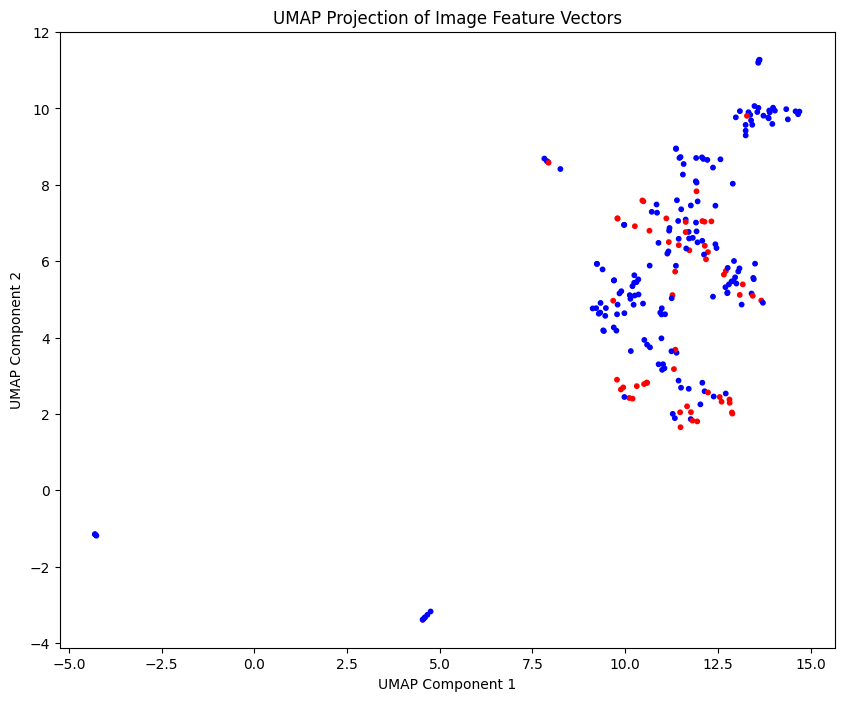

In [94]:
plt.figure(figsize=(10, 8))
# plt.scatter(results[:, 0], results[:, 1], s=10, c='blue', marker='o')
plt.scatter(results_siglib[:, 0], results_siglib[:, 1], s=10, c=colors_siglib, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# for i, filename in enumerate(filenames_siglib):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_siglib[i, 0], results_siglib[i, 1]), fontsize=8)

plt.show()

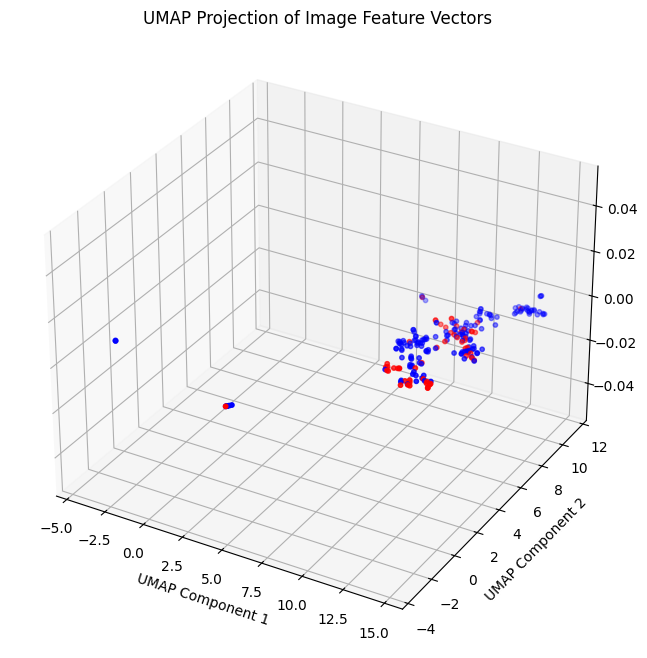

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results_siglib[:, 0], results_siglib[:, 1], s=10, c=colors_siglib, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# for i, filename in enumerate(filenames):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results[i, 0], results[i, 1]), fontsize=8)

plt.show()

#### Только для автопортретов

In [96]:
self_portraits_dict_siglib = {}

for key in features_dict_siglib:
    if '_a_' in key:
        self_portraits_dict_siglib[key] = features_dict_siglib[key]

print(f'Количество авторпортретов: {len(self_portraits_dict_siglib)}')

Количество авторпортретов: 51


In [104]:
features_self_portrait_siglib = list(self_portraits_dict_siglib.values())
features_self_portrait_siglib = np.array(features_self_portrait_siglib)
print(features_self_portrait_siglib.shape)

(51, 196, 768)


In [106]:
features_self_portrait_siglib = features_self_portrait_siglib.reshape(51, -1)
features_self_portrait_siglib.shape

(51, 150528)

In [107]:
filenames_self_portrait_siglib = list(self_portraits_dict_siglib.keys())
print(len(filenames_self_portrait_siglib))

51


In [ ]:
colors = []
for filename in filenames_self_portrait_siglib:
    if '_a_' in filename:
        if filename.split('_')[0] == 'yyyy': 
            colors.append('blue')
        elif int(filename.split('_')[0]) < 1908:
            colors.append('blue')
        else:
            colors.append('red')

In [113]:
print(len(colors))

51


In [108]:
model = umap.UMAP(
            n_neighbors=3,
            n_components=2, 
            random_state=42
            )

In [110]:
results_self_siglib = model.fit_transform(features_self_portrait_siglib)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



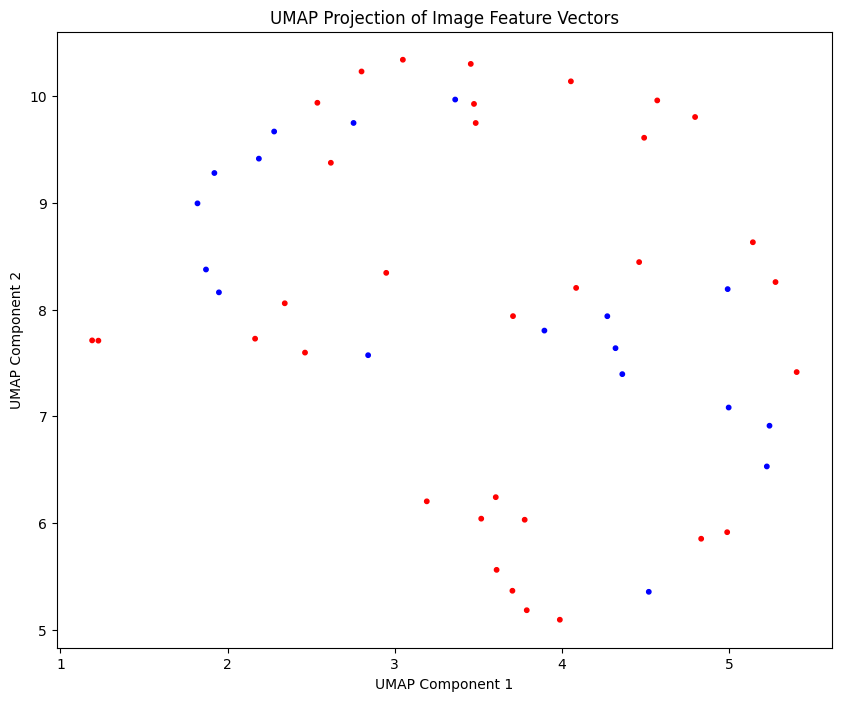

In [114]:
plt.figure(figsize=(10, 8))
plt.scatter(results_self_siglib[:, 0], results_self_siglib[:, 1], s=10, c=colors, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# for i, filename in enumerate(filenames):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_self_siglib[i, 0], results_self_siglib[i, 1]), fontsize=8)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



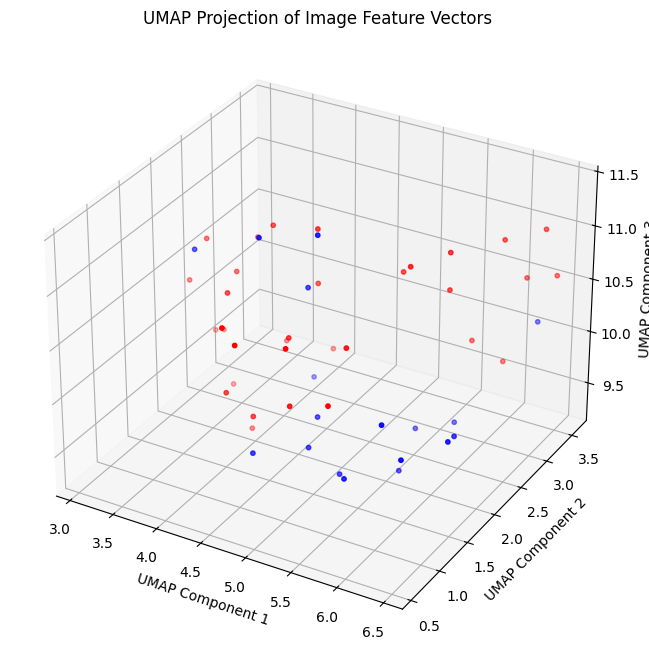

In [117]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

model = umap.UMAP(
            n_neighbors=5,
            n_components=3, 
            random_state=42
            )
results = model.fit_transform(features_self_portrait_siglib)

colors = []
for filename in filenames_self_portrait_siglib:
    if filename.split('_')[0] == 'yyyy': 
        colors.append('blue')
    elif int(filename.split('_')[0]) < 1908:
        colors.append('blue')
    else:
        colors.append('red')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(results[:, 0], results[:, 1], results[:, 2], s=10, c=colors, marker='o')
ax.set_title('UMAP Projection of Image Feature Vectors')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')

# for i, filename in enumerate(filenames_self_portrait):
#     ax.text(results[i, 0], results[i, 1], results[i, 2], ' '.join(filename.split('_')[4:]).split('.')[0], fontsize=8)

plt.show()

## U-map для векторов ViT

In [ ]:
with open('features_vit.json', 'r', encoding='utf-8') as f:
    features_dict_vit = json.load(f)

In [119]:
len(features_dict_vit)

223

In [121]:
features_vit = np.array([features_dict_vit[filename] for filename in features_dict_vit])
filenames_vit = list(features_dict_vit.keys())

In [122]:
print(len(features_vit), len(filenames_vit))

223 223


In [123]:
filenames_pics_vit = [filename.split('/')[-1] for filename in filenames_vit]
# print(filenames_pics)

#### Для всех картин в датасете

In [124]:
model = umap.UMAP(
            n_neighbors=3,
            n_components=2, 
            random_state=42
            )

In [129]:
results_vit = model.fit_transform(features_vit)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [127]:
colors_vit = []
for filename in filenames_vit:
    if filename.split('_')[0] == 'yyyy': # blue - before treatment
        colors_vit.append('blue')
    elif int(filename.split('_')[0]) < 1908:
        colors_vit.append('blue')
    else:
        colors_vit.append('red') # red - after treatment

In [128]:
print(len(colors_vit))

223


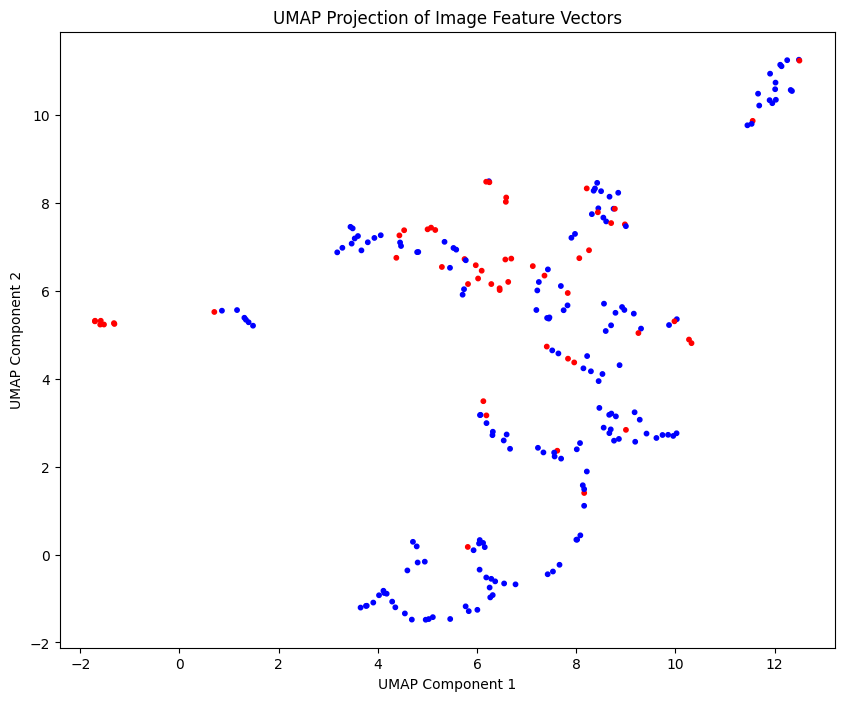

In [132]:
plt.figure(figsize=(10, 8))
# plt.scatter(results[:, 0], results[:, 1], s=10, c='blue', marker='o')
plt.scatter(results_vit[:, 0], results_vit[:, 1], s=10, c=colors_vit, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# for i, filename in enumerate(filenames_vit):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_vit[i, 0], results_vit[i, 1]), fontsize=8)

plt.show()

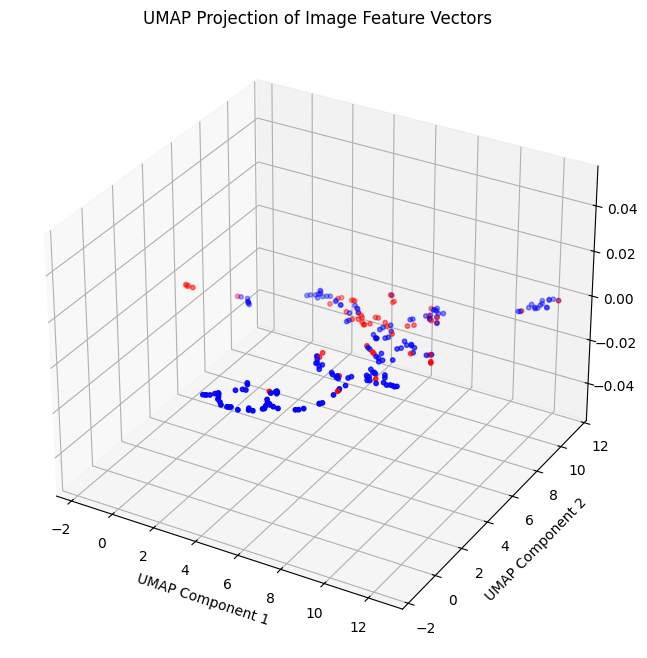

In [133]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results_vit[:, 0], results_vit[:, 1], s=10, c=colors_vit, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# for i, filename in enumerate(filenames_vit):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_vit[i, 0], results_vit[i, 1]), fontsize=8)

plt.show()

#### Только для автопортретов

In [143]:
self_portraits_dict_vit = {}

for key in features_dict_vit:
    if '_a_' in key:
        self_portraits_dict_vit[key] = features_dict_vit[key]

print(f'Количество авторпортретов: {len(self_portraits_dict_vit)}')

Количество авторпортретов: 51


In [144]:
features_self_portrait_vit = list(self_portraits_dict_vit.values())
features_self_portrait_vit = np.array(features_self_portrait_vit)
print(len(features_self_portrait_vit))

51


In [145]:
filenames_self_portrait_vit = list(self_portraits_dict_vit.keys())
print(len(filenames_self_portrait_vit))

51


In [173]:
model = umap.UMAP(
            n_neighbors=3,
            n_components=2, 
            random_state=42
            )

In [174]:
results = model.fit_transform(features_self_portrait_vit)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [175]:
colors_vit_self = []
for filename in filenames_self_portrait_vit:
    if '_a_' in filename:
        if filename.split('_')[0] == 'yyyy': 
            colors_vit_self.append('blue')
        elif int(filename.split('_')[0]) < 1908:
            colors_vit_self.append('blue')
        else:
            colors_vit_self.append('red')

In [176]:
print(len(colors_vit_self))

51


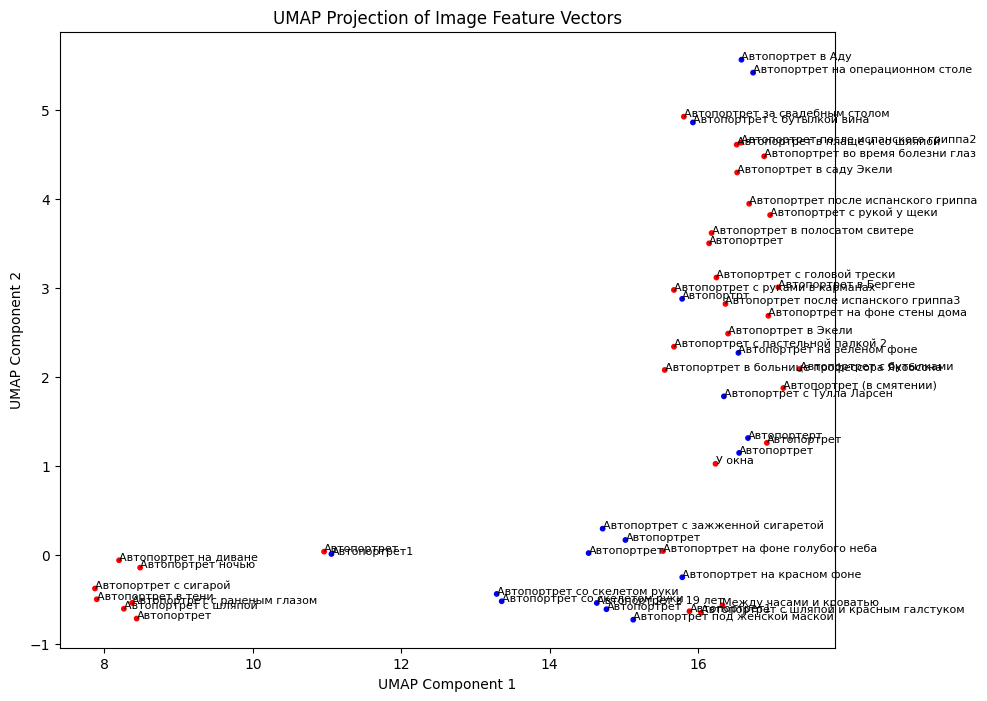

In [177]:
plt.figure(figsize=(10, 8))
plt.scatter(results[:, 0], results[:, 1], s=10, c=colors_vit_self, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

for i, filename in enumerate(filenames_self_portrait_vit):
    plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results[i, 0], results[i, 1]), fontsize=8)

plt.show()

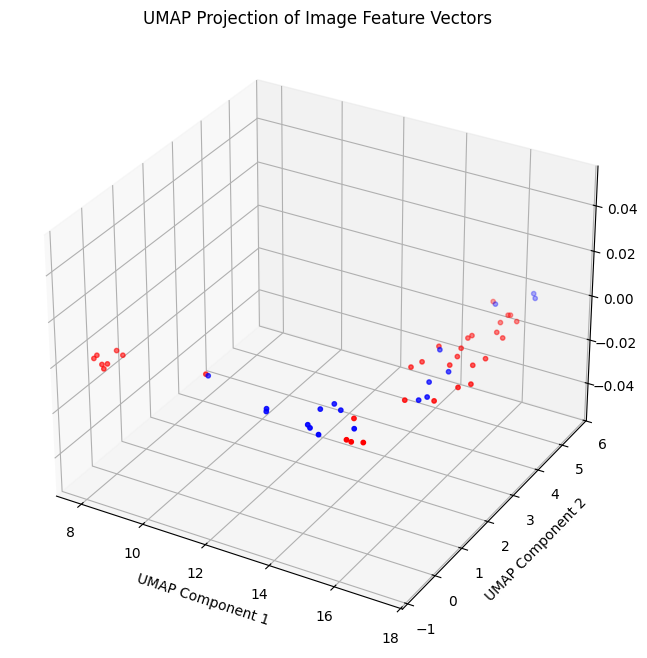

In [178]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results[:, 0], results[:, 1], s=10, c=colors_vit_self, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# for i, filename in enumerate(filenames_self_portrait_vit):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results[i, 0], results[i, 1]), fontsize=8)

plt.show()

## U-map для векторов CLIP

In [151]:
with open('features_clip.json', 'r', encoding='utf-8') as f:
    features_dict_clip = json.load(f)

In [152]:
len(features_dict_clip)

223

In [153]:
features_clip = np.array([features_dict_clip[filename] for filename in features_dict_clip])
filenames_clip = list(features_dict_clip.keys())

In [154]:
filenames_pics_clip = [filename.split('/')[-1] for filename in filenames_clip]

#### Для всех картинок в датасете

In [155]:
model = umap.UMAP(
            n_neighbors=3,
            n_components=2, 
            random_state=42
            )

In [156]:
results_clip = model.fit_transform(features_clip)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [157]:
colors_clip = []
for filename in filenames_clip:
    if filename.split('_')[0] == 'yyyy': # blue - before treatment
        colors_clip.append('blue')
    elif int(filename.split('_')[0]) < 1908:
        colors_clip.append('blue')
    else:
        colors_clip.append('red') # red - after treatment

In [158]:
len(colors_clip)

223

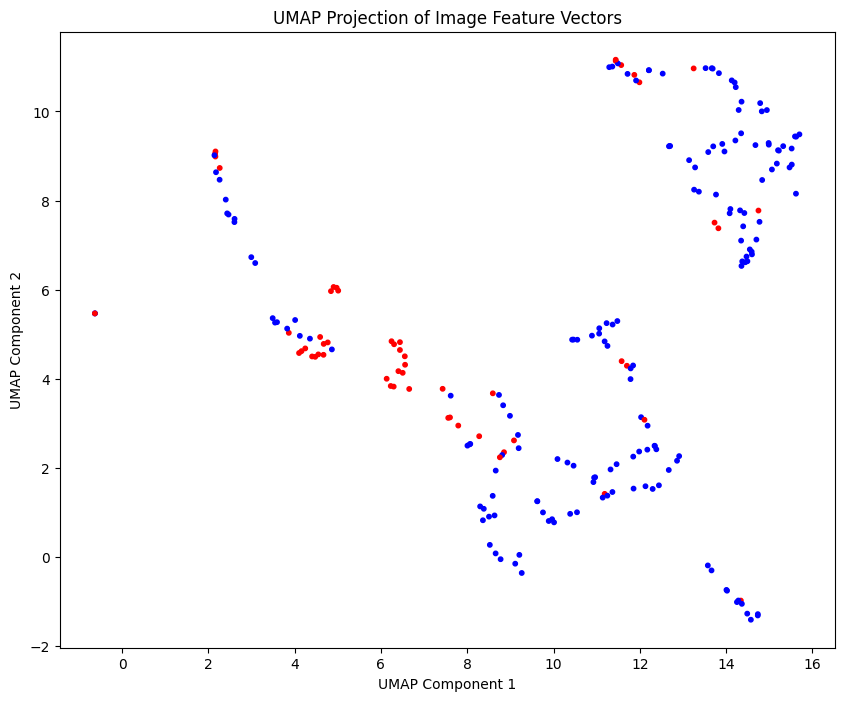

In [159]:
plt.figure(figsize=(10, 8))
# plt.scatter(results[:, 0], results[:, 1], s=10, c='blue', marker='o')
plt.scatter(results_clip[:, 0], results_clip[:, 1], s=10, c=colors_clip, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# for i, filename in enumerate(filenames_clip):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_clip[i, 0], results_clip[i, 1]), fontsize=8)

plt.show()

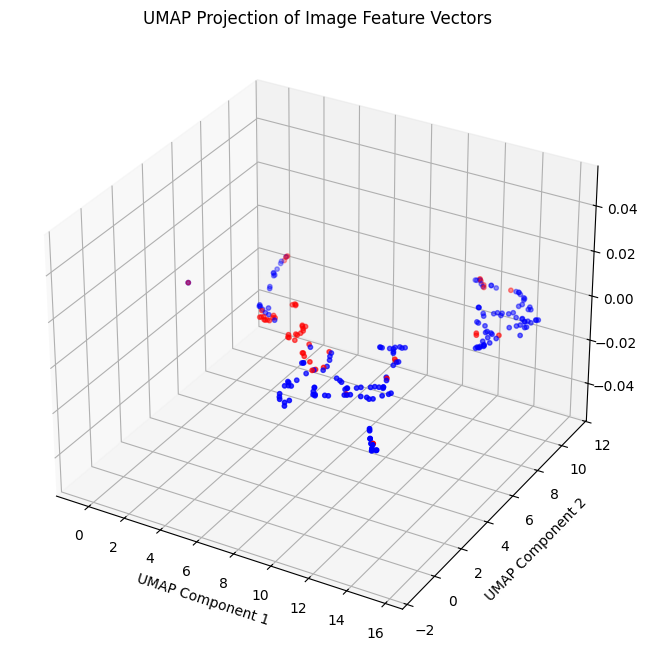

In [160]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results_clip[:, 0], results_clip[:, 1], s=10, c=colors_clip, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# for i, filename in enumerate(filenames_clip):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_clip[i, 0], results_clip[i, 1]), fontsize=8)

plt.show()

#### Только для автопортретов

In [161]:
self_portraits_dict_clip = {}

for key in features_dict_clip:
    if '_a_' in key:
        self_portraits_dict_clip[key] = features_dict_clip[key]

print(f'Количество авторпортретов: {len(self_portraits_dict_clip)}')

Количество авторпортретов: 51


In [162]:
features_self_portrait_clip = list(self_portraits_dict_clip.values())
features_self_portrait_clip = np.array(features_self_portrait_clip)
# print(len(features_self_portrait_vit))

In [163]:
filenames_self_portrait_clip = list(self_portraits_dict_clip.keys())
# print(len(filenames_self_portrait_clip))

In [164]:
model = umap.UMAP(
            n_neighbors=3,
            n_components=2, 
            random_state=42
            )

In [165]:
results_self_clip = model.fit_transform(features_self_portrait_clip)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [166]:
colors_clip_self = []
for filename in filenames_self_portrait_clip:
    if '_a_' in filename:
        if filename.split('_')[0] == 'yyyy': 
            colors_clip_self.append('blue')
        elif int(filename.split('_')[0]) < 1908:
            colors_clip_self.append('blue')
        else:
            colors_clip_self.append('red')

In [167]:
len(colors_clip_self)

51

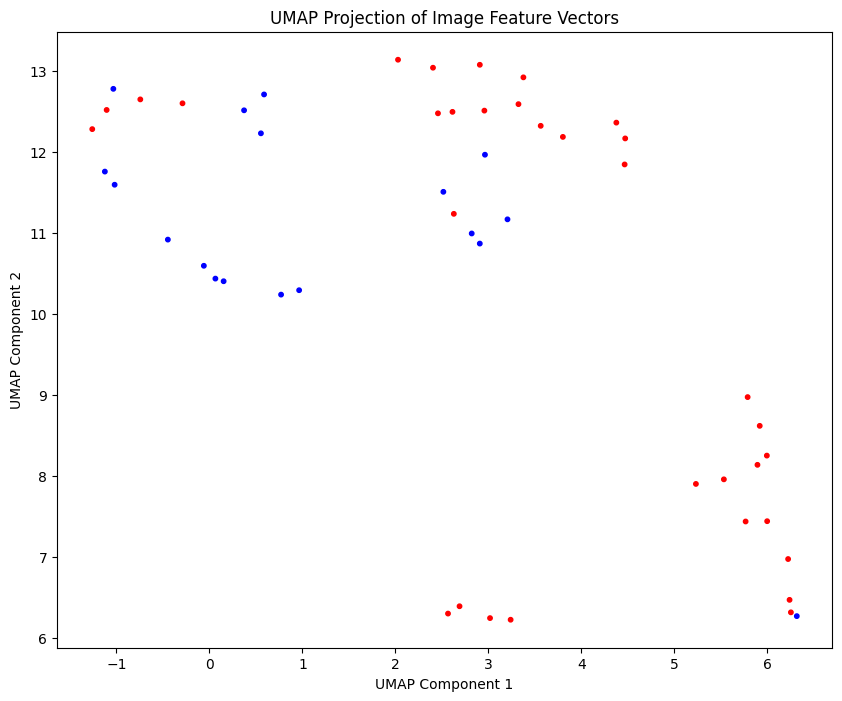

In [169]:
plt.figure(figsize=(10, 8))
plt.scatter(results_self_clip[:, 0], results_self_clip[:, 1], s=10, c=colors_clip_self, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# for i, filename in enumerate(filenames_self_portrait_clip):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_self_clip[i, 0], results_self_clip[i, 1]), fontsize=8)

plt.show()

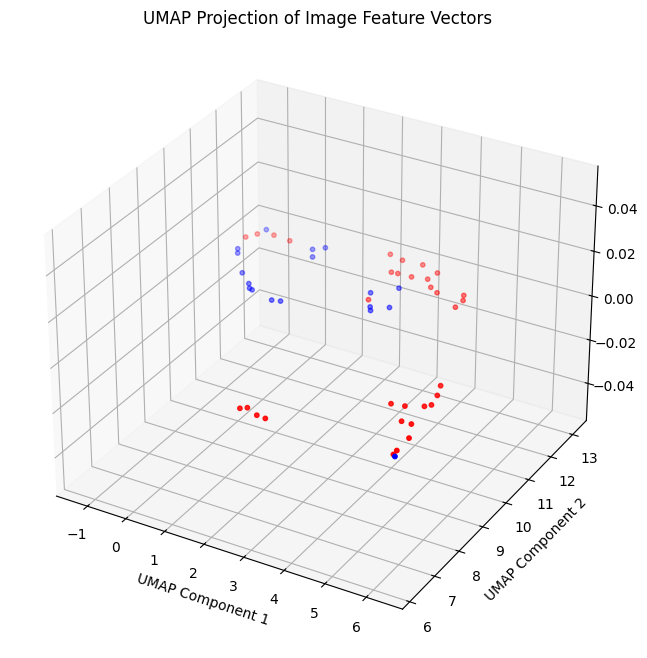

In [172]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
plt.scatter(results_self_clip[:, 0], results_self_clip[:, 1], s=10, c=colors_clip_self, marker='o')
plt.title('UMAP Projection of Image Feature Vectors')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# for i, filename in enumerate(filenames_self_portrait_clip):
#     plt.annotate(' '.join(filename.split('_')[4:]).split('.')[0], (results_self_clip[i, 0], results_self_clip[i, 1]), fontsize=8)

plt.show()